### Student Information
Name: Daniel Schulz

Student ID: J144030003

GitHub ID: 79483364

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import PAMI
import umap
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download('stopwords') # download the NLTK stopwords

reddit_data = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
reddit_data.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [3]:
reddit_data = reddit_data[['type', 'title', 'author', 'text','sentiment', 'label']]
#reddit_data = reddit_data[['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']]
reddit_data.dropna(inplace=True)
reddit_data.head()

,type,title,author,text,sentiment,label
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0
3,post,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0


In [4]:
len(reddit_data)

print(reddit_data['type'][0:10])

0    comment
1    comment
2    comment
3       post
4    comment
5    comment
6    comment
7    comment
8    comment
9    comment
Name: type, dtype: object


In [5]:
for t in reddit_data['text'][0:10]:
    print(nltk.word_tokenize(t))

['Calls', 'on', 'retards']
['Stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', '?', 'No', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever', '.']
['Seeing', 'lots', 'of', 'red', 'in', 'the', 'ticker', '.']
['Vision', 'Marine', 'Technologies', 'Inc.', 'is', 'rewriting', 'the', 'watercraft', 'rulebook', '.', 'Their', 'collaboration', 'with', 'Shaun', 'Torrente', 'has', 'achieved', 'the', 'unthinkable', '–', 'a', 'blazing', '116', 'mph', 'on', 'water', '!', 'This', 'is', "n't", 'just', 'about', 'speed', ';', 'it', "'s", 'about', 'propelling', 'electric', 'boating', 'into', 'a', 'new', 'era', '.', 'Their', 'cutting-edge', 'technology', ',', 'combined', 'with', 'Torrente', "'s", 'skill', ',', 'is', 'making', 'waves', 'that', "'ll", 'ripple', 'for', 'generations', '.', '*', '*', 'Highlight', 'Main', 'Points', '*', '*', '*', 'Vision', 'Marine', 'Technologies', 'Inc.', 'achieves', 'a', 

In [6]:
# Query Last 10 entries
reddit_data['text'][-10:]

837               Finance media lying \r\n\r\n*Surprise*
838                                          I am all in
839                                 The Art of the Deal…
840                                               Lol fr
841    So countries “begging to stop the tariffs” and...
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, dtype: object

In [7]:
reddit_data.iloc[:10, 0:3]

,type,title,author
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437
2,comment,How do you feel about a sitting president maki...,Btankersly66
3,post,Who knows more? $VMAR,emiljenfn
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus
6,comment,Is the market in complete denial right now?,stoniey84
7,comment,Retardation is on the menu boys! WSB is so back,OSRSkarma
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox
9,comment,Any cheap stocks under $10?,Zumuru


In [8]:
reddit_data[reddit_data['type'] == 'comment']

,type,title,author,text,sentiment,label
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0
...,...,...,...,...,...,...
841,comment,The Trump administration is begging Xi Jinping...,le_mihai,So countries “begging to stop the tariffs” and...,0.0,1.0
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,Invest now it is going to shoot up tomorrow,0.0,1.0
843,comment,$ U.S. dollar value (crashing),lulububudu,Where can I read this?,0.0,0.0
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,i sold my puts so i expect cheeto to declare w...,0.0,-1.0


In [9]:
reddit_data.isnull()

,type,title,author,text,sentiment,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
842,False,False,False,False,False,False
843,False,False,False,False,False,False
844,False,False,False,False,False,False
845,False,False,False,False,False,False


In [10]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "type"])
dummy_series

text    dummy_record
type               1
dtype: object

In [11]:
dummy_series.to_frame().T

,text,type
0,dummy_record,1


In [12]:
result_with_series = pd.concat([reddit_data[['text','type']], dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

848

In [13]:
import helpers.data_mining_helpers as dmh

result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,type
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [14]:
reddit_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [15]:
sum(reddit_data.duplicated())

23

In [16]:
sum(reddit_data.duplicated('text'))

23

In [17]:
reddit_data.drop_duplicates(inplace=True)

In [18]:
sum(reddit_data.duplicated())

0

In [19]:
X_sample = reddit_data.sample(n=350)
len(X_sample)

350

sentiment
 1.0    316
 0.0    312
-1.0    196
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

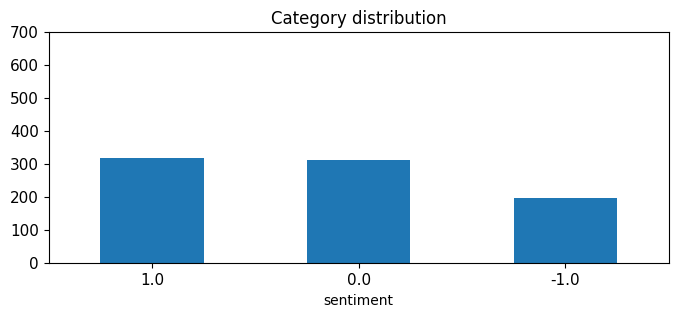

In [20]:
print(reddit_data.sentiment.value_counts())

# plot barchart for X
reddit_data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

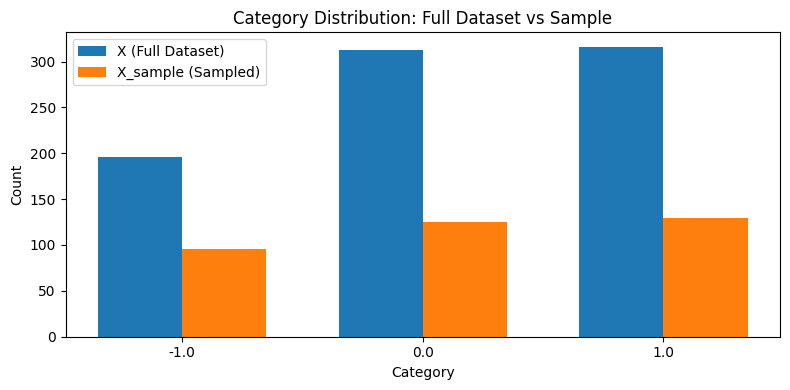

In [21]:
import numpy as np

# Side-by-side comparison of category distributions in X and X_sample

# Get value counts for both datasets
x_counts = reddit_data['sentiment'].value_counts().sort_index()
x_sample_counts = X_sample['sentiment'].value_counts().sort_index()

# Align indices for plotting
categories_sorted = sorted(reddit_data['sentiment'].unique())
x_counts = x_counts.reindex(categories_sorted, fill_value=0)
x_sample_counts = x_sample_counts.reindex(categories_sorted, fill_value=0)


bar_width = 0.35
index = np.arange(len(categories_sorted))

plt.figure(figsize=(8,4))
plt.bar(index, x_counts, bar_width, label='X (Full Dataset)')
plt.bar(index + bar_width, x_sample_counts, bar_width, label='X_sample (Sampled)')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution: Full Dataset vs Sample')
plt.xticks(index + bar_width / 2, categories_sorted, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
reddit_data['unigrams'] = reddit_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [24]:
reddit_data[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [25]:
reddit_data[0:4]

,type,title,author,text,sentiment,label,unigrams
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0,"[Calls, on, retards]"
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [26]:
list(reddit_data[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(reddit_data.text) #learn the vocabulary and return document-term matrix
print(X_counts[3])

  (np.int32(0), np.int32(2706))	2
  (np.int32(0), np.int32(2024))	1
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(175))	4
  (np.int32(0), np.int32(2161))	2
  (np.int32(0), np.int32(3848))	8
  (np.int32(0), np.int32(2687))	4
  (np.int32(0), np.int32(4145))	3
  (np.int32(0), np.int32(2422))	3
  (np.int32(0), np.int32(3823))	3
  (np.int32(0), np.int32(2026))	3
  (np.int32(0), np.int32(2149))	3
  (np.int32(0), np.int32(3263))	1
  (np.int32(0), np.int32(4190))	2
  (np.int32(0), np.int32(3313))	1
  (np.int32(0), np.int32(3849))	2
  (np.int32(0), np.int32(856))	2
  (np.int32(0), np.int32(4271))	3
  (np.int32(0), np.int32(3437))	3
  (np.int32(0), np.int32(3930))	4
  (np.int32(0), np.int32(1837))	1
  (np.int32(0), np.int32(195))	1
  (np.int32(0), np.int32(4066))	1
  (np.int32(0), np.int32(560))	1
  (np.int32(0), np.int32(18))	3
  :	:
  (np.int32(0), np.int32(1068))	1
  (np.int32(0), np.int32(1306))	1
  (np.int32(0), np.int32(950))	1
  (np.int32(0), np.int32(3911))	2
  (np.int32(0),

In [28]:
count_vect.get_feature_names_out()[450]

'badly'

In [29]:
count_vect.get_feature_names_out()[1100]

'deep'

In [30]:
analyze = count_vect.build_analyzer()
analyze(reddit_data.text[3])

['vision',
 'marine',
 'technologies',
 'inc',
 'is',
 'rewriting',
 'the',
 'watercraft',
 'rulebook',
 'their',
 'collaboration',
 'with',
 'shaun',
 'torrente',
 'has',
 'achieved',
 'the',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'on',
 'water',
 'this',
 'isn',
 'just',
 'about',
 'speed',
 'it',
 'about',
 'propelling',
 'electric',
 'boating',
 'into',
 'new',
 'era',
 'their',
 'cutting',
 'edge',
 'technology',
 'combined',
 'with',
 'torrente',
 'skill',
 'is',
 'making',
 'waves',
 'that',
 'll',
 'ripple',
 'for',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'inc',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'on',
 'water',
 'with',
 'shaun',
 'torrente',
 'the',
 'feat',
 'highlights',
 'the',
 'power',
 'of',
 'electric',
 'boating',
 'and',
 'pushes',
 'the',
 'limits',
 'of',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'and',
 'danfoss',
 'editron',
 'contribute',
 'to',
 

In [31]:
X_counts.shape

(824, 4346)

In [32]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [33]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [34]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [35]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(reddit_data.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

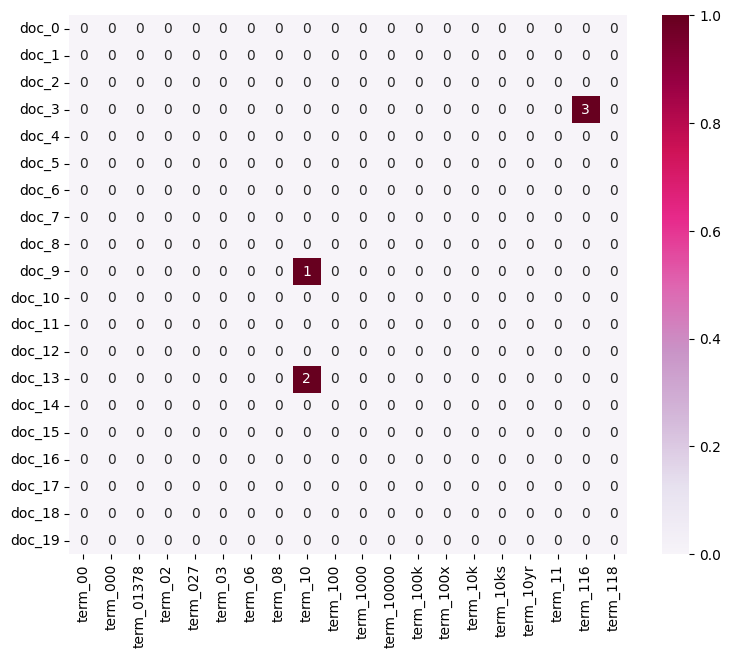

In [36]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

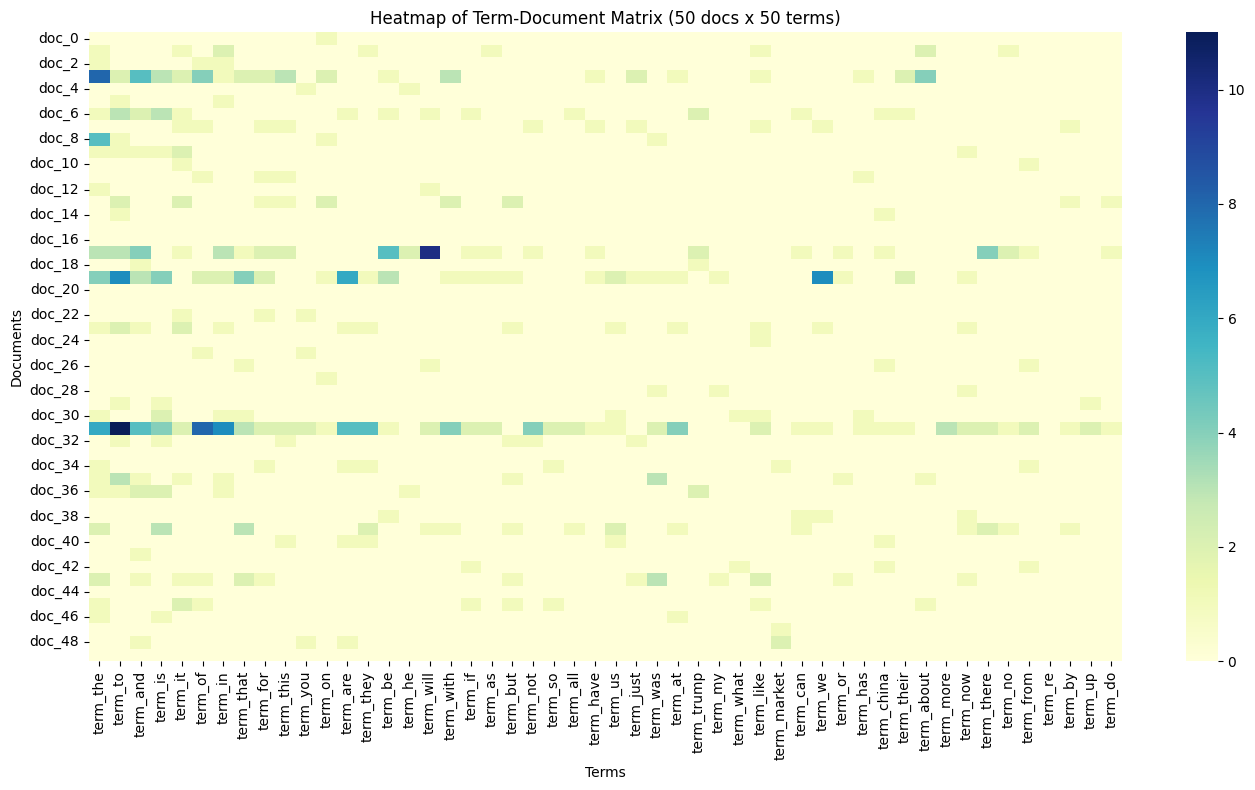

In [37]:
import numpy as np

# Answer here
# To efficiently visualize a larger portion or the entire term-document matrix, you should:
# - Sample a manageable number of documents and terms (e.g., top N most frequent terms)
# - Use the .toarray() method only on the selected subset to avoid memory issues
# - Optionally, normalize or binarize the matrix for better visualization

# Get top 50 terms by overall frequency
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
top_term_indices = term_frequencies.argsort()[-50:][::-1]
top_terms = count_vect.get_feature_names_out()[top_term_indices]

# Select first 50 documents
doc_indices = np.arange(50)

# Extract the submatrix
submatrix = X_counts[doc_indices[:, None], top_term_indices].toarray()

# Prepare labels
plot_x_large = [f"term_{t}" for t in top_terms]
plot_y_large = [f"doc_{i}" for i in doc_indices]

# Create DataFrame for seaborn
df_large = pd.DataFrame(submatrix, columns=plot_x_large, index=plot_y_large)

plt.figure(figsize=(14, 8))
sns.heatmap(df_large, cmap="YlGnBu", vmin=0, vmax=submatrix.max(), annot=False)
plt.title("Heatmap of Term-Document Matrix (50 docs x 50 terms)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()


In [38]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [39]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [40]:
term_frequencies[0]

np.int64(4)

C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


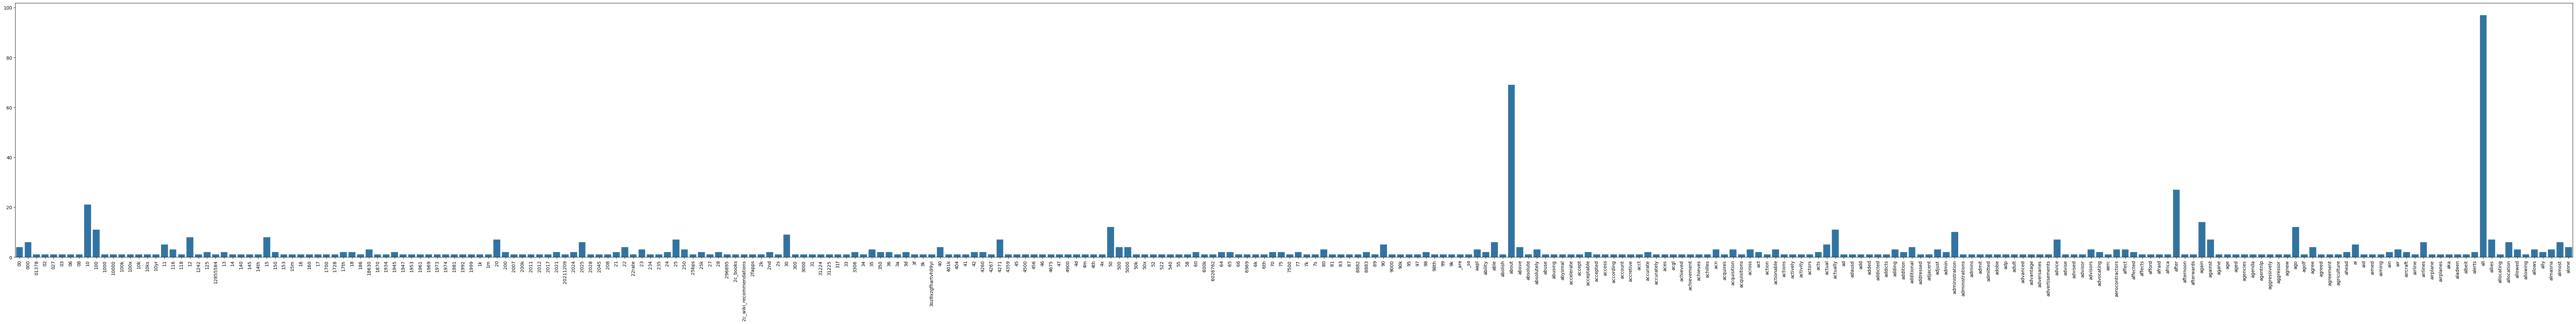

In [41]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [42]:
# Answer here
import plotly.express as px

# Create an interactive bar plot for the first 100 terms
terms = count_vect.get_feature_names_out()[:100]
freqs = term_frequencies[:100]

fig = px.bar(x=terms, y=freqs, labels={'x': 'Term', 'y': 'Frequency'}, title='Term Frequencies (First 100 Terms)')
fig.update_layout(xaxis_tickangle=90, width=1200, height=500)
fig.show()

In [43]:
# Answer here
# Efficiently visualize only the top N most frequent terms
import plotly.express as px

N = 30  # Number of top terms to visualize
top_indices = term_frequencies.argsort()[-N:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_freqs = term_frequencies[top_indices]

fig = px.bar(x=top_terms, y=top_freqs, labels={'x': 'Term', 'y': 'Frequency'}, title=f'Top {N} Term Frequencies')
fig.update_layout(xaxis_tickangle=90, width=900, height=400)
fig.show()

In [44]:
# Answer here
import plotly.express as px

terms = count_vect.get_feature_names_out()


# Sort all terms by frequency in descending order
sorted_indices = term_frequencies.argsort()[::-1]
sorted_terms = terms[sorted_indices]
sorted_freqs = term_frequencies[sorted_indices]

# Visualize the top N terms sorted by frequency
N = 30
fig = px.bar(
    x=sorted_terms[:N],
    y=sorted_freqs[:N],
    labels={'x': 'Term', 'y': 'Frequency'},
    title=f'Top {N} Terms Sorted by Frequency'
)
fig.update_layout(xaxis_tickangle=90, width=900, height=400)
fig.show()


In [45]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



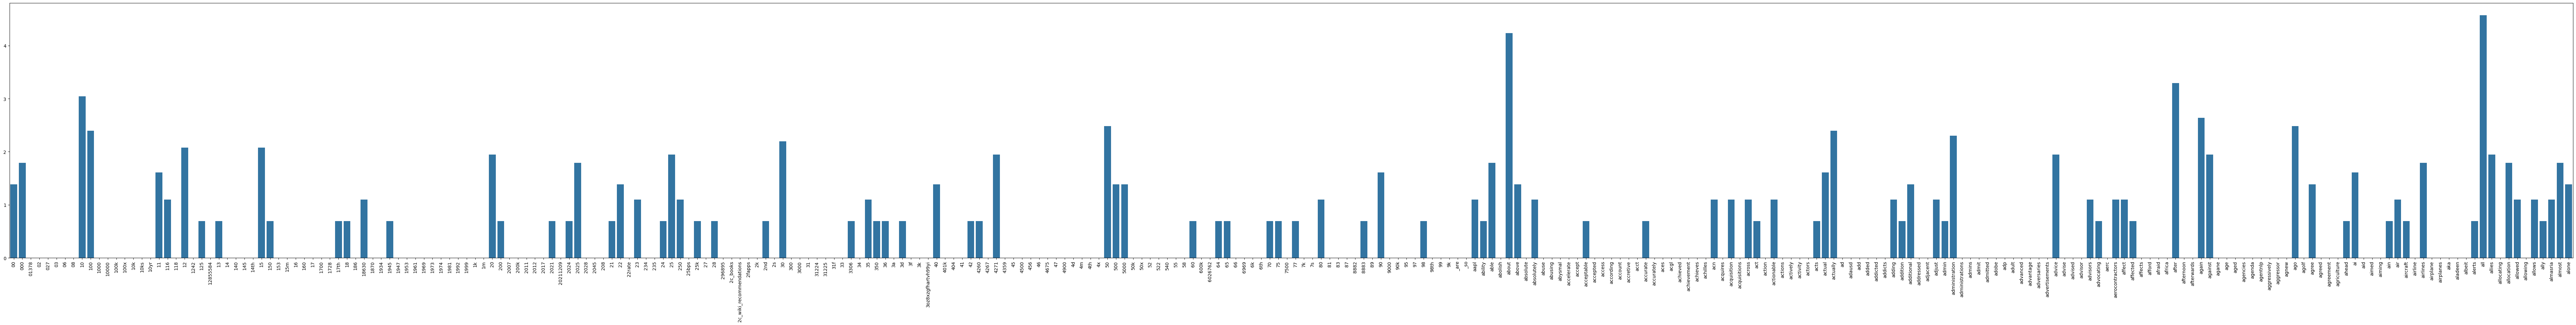

In [46]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [47]:
import plotly.express as px
import numpy as np

terms = count_vect.get_feature_names_out()


# Sort all terms by frequency in descending order
sorted_indices = np.array(term_frequencies_log).argsort()[::-1]
sorted_terms = terms[sorted_indices]
sorted_freqs = np.array(term_frequencies_log)[sorted_indices]

# Visualize the top N terms sorted by frequency
N = 30
fig = px.bar(
    x=sorted_terms[:N],
    y=sorted_freqs[:N],
    labels={'x': 'Term', 'y': 'Frequency'},
    title=f'Top {N} Terms Sorted by Frequency'
)
fig.update_layout(xaxis_tickangle=90, width=900, height=400)
fig.show()


# TASK 3 DIFFERENT VIZUALISATIONS

In [48]:
!pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [49]:
import plotly.express as px

# Get top 30 terms by frequency
N = 30
top_indices = term_frequencies.argsort()[-N:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_freqs = term_frequencies[top_indices]

fig = px.treemap(
    names=top_terms,
    parents=[""]*N,
    values=top_freqs,
    title="Treemap of Top 30 Term Frequencies"
)
fig.show()

C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\519203764.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



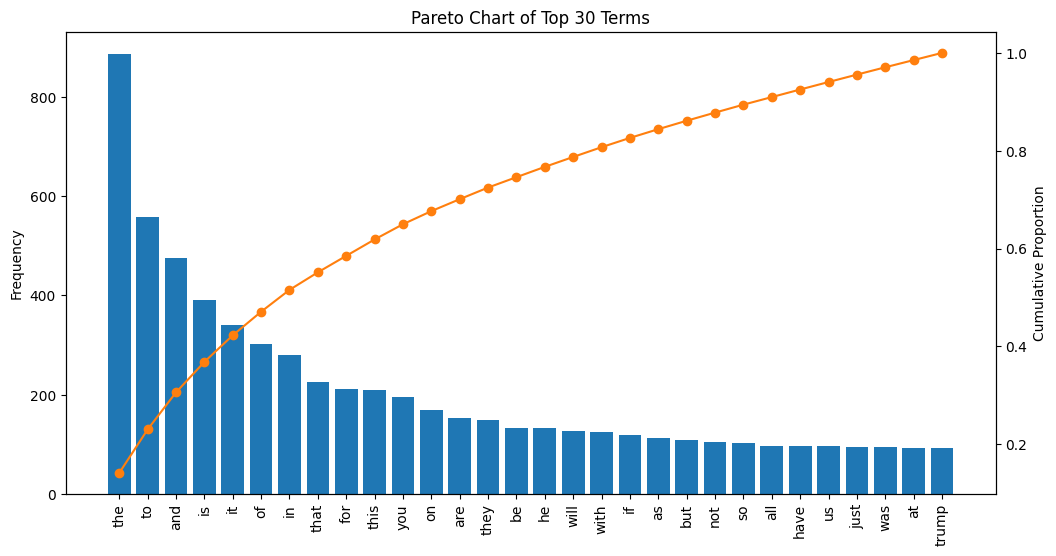

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Sort terms by frequency
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices][:30]
sorted_freqs = term_frequencies[sorted_indices][:30]
cum_freq = np.cumsum(sorted_freqs) / np.sum(sorted_freqs)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(sorted_terms, sorted_freqs, color='C0')
ax2 = ax1.twinx()
ax2.plot(sorted_terms, cum_freq, color='C1', marker='o', linestyle='-')
ax1.set_xticklabels(sorted_terms, rotation=90)
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Proportion')
plt.title('Pareto Chart of Top 30 Terms')
plt.show()

# Phase 2

In [52]:
reddit_data

,type,title,author,text,sentiment,label,unigrams
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0,"[Calls, on, retards]"
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...,...,...,...
841,comment,The Trump administration is begging Xi Jinping...,le_mihai,So countries “begging to stop the tariffs” and...,0.0,1.0,"[So, countries, “, begging, to, stop, the, tar..."
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,Invest now it is going to shoot up tomorrow,0.0,1.0,"[Invest, now, it, is, going, to, shoot, up, to..."
843,comment,$ U.S. dollar value (crashing),lulububudu,Where can I read this?,0.0,0.0,"[Where, can, I, read, this, ?]"
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [53]:
### Begin Assignment Here

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = reddit_data['type'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = reddit_data[reddit_data['type'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [58]:
category_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category post:


,01378,08,10,11,116,12,13,15m,16,18,...,yahoo,year,years,yet,yield,yields,you,young,your,zone
0,0,0,0,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,5,0,4,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


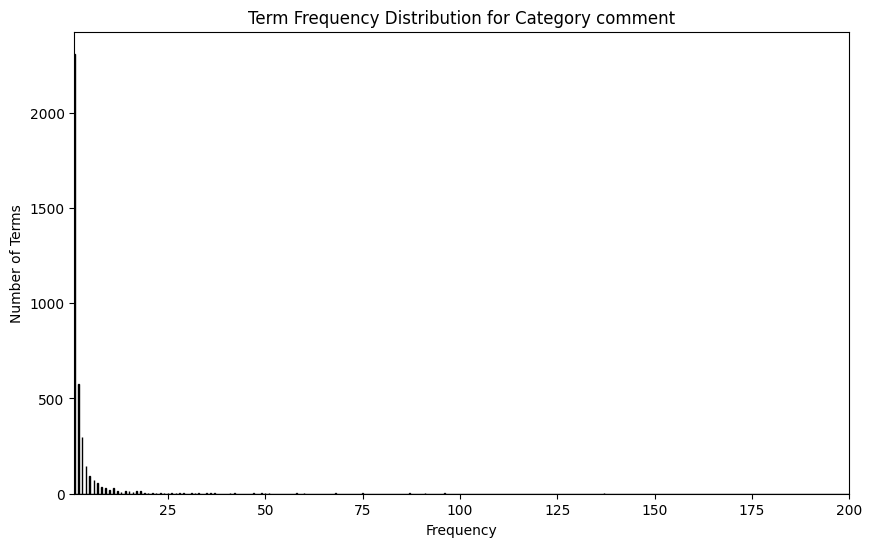

In [59]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [60]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comment
Number of terms in top 5%: 194
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'you', 'for', 'they', 'on', 'are', 'he', 'will', 'be', 'if', 'not', 'but', 'with', 'us', 'so', 'as', 'trump', 'all', 'was', 'have', 'at', 'just', 'what', 'my', 'we', 'can', 'china', 'or', 'like', 'has', 'there', 'now', 'no', 'about', 'market', 'more', 'their', 'people', 're', 'do', 'his', 'even', 'think', 'up', 'them', 'from', 'how', 'one', 'by', 'going', 'money', 'would', 'when', 'good', 'your', 'any', 'who', 'than', 'some', 'tariffs', 'out', 'an', 'him', 'why', 'only', 'see', 'been', 'other', 'get', 'make', 'then', 'don', 'over', 'time', 'silver', 'doing', 'want', 'because', 'still', 'down', 'me', 'right', 'go', 'years', 'day', 'economy', 'could', 'did', 'our', 'after', 'much', 'buy', 'doesn', 'should', 'into', 'here', 'way', 'really', 'long', 'also', 'too', 'world', 'last', 'first', 'dollar', 'know', 'back', 'most', 'trade', 'everyone', 'week', 'well', 'year'

In [61]:
#Skipped the exploration part of the most/least frequent words, as I continue with processing the dataset into pattern recognition

category_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comment we filter the following words:
Bottom 1.0% words: 
13          1
12855584    1
1242        1
118         1
10yr        1
10ks        1
10k         1
100x        1
100k        1
10000       1
1000        1
yoyo        1
mutual      1
mute        1
muslims     1
muslim      1
18          1
1728        1
1700        1
17          1
160         1
153         1
14th        1
145         1
140         1
14          1
06          1
03          1
027         1
02          1
zgld        1
yelling     1
235         1
234         1
208         1
2045        1
2028        1
2024        1
dtype: int64
Top 5.0% words: 
least       13
take        14
hold        14
trading     14
before      14
          ... 
it         321
is         359
and        393
to         501
the        774
Length: 194, dtype: int64

For category post we filter the following words:
Bottom 1.0% words: 
08          1
adjust      1
worst       1
works       1
word        1
wobbling    1
without     1
25    

,00,000,100,11,12,125,15,150,17th,186,...,yippee,yo,young,yours,yourself,yourselves,youtube,yup,zero,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [63]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Database size (total no of transactions) : 768
Number of items : 3651
Minimum Transaction Size : 1
Average Transaction Size : 9.266927083333334
Maximum Transaction Size : 191
Standard Deviation Transaction Size : 13.042312947307947
Variance in Transaction Sizes : 170.32370267003478
Sparsity : 0.9974618112617548


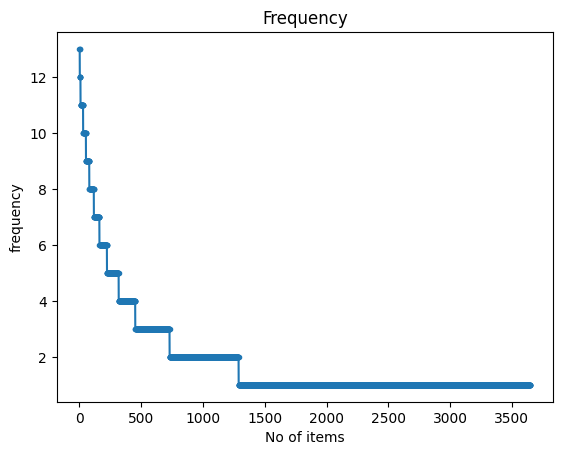

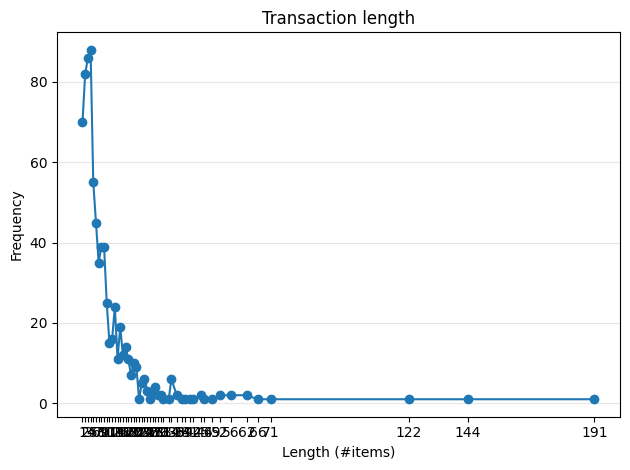

In [66]:
# Demonstration one Transactional DB

from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comment.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [69]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_comment.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_comment= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comment))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 80
Runtime: 0.02149343490600586


### I will focus on the comment section and posts in the pattern recognitions 

In [70]:
obj1.save('freq_patterns_comment_minSup9.txt') #save the patterns
frequentPatternsDF_comment

,Patterns,Support
0,lot,9
1,americans,9
2,many,9
3,rates,9
4,wrong,9
...,...,...
75,ago,12
76,news,12
77,big,13
78,pretty,13


In [71]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_post.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_post= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_post))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

obj3.save('freq_patterns_post_minSup9.txt') #save the patterns
frequentPatternsDF_post

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.019166231155395508


,Patterns,Support


In [72]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_post, frequentPatternsDF_comment]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns Support
79  everything      13
78      pretty      13
77         big      13
76        news      12
75         ago      12
..         ...     ...
23        love       9
24        yeah       9
25      please       9
26        seen       9
0          lot       9

[80 rows x 2 columns]
Number of patterns discarded: 0


In [74]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
reddit_data_tdm = count_vect.fit_transform(reddit_data['text'])  # reddit_data['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
reddit_data['tokenized_text'] = reddit_data['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(reddit_data_tdm.toarray(), columns=terms, index=reddit_data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,stop,higher,mean,thanks,done,love,yeah,please,seen,lot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Doing this process for the comment section only

from PAMI.frequentPattern.topk import FAE as algFAE
from PAMI.frequentPattern.maximal import MaxFPGrowth  as algG


kCount={500, 1000, 1200} 
minSup = {3, 6, 9}

seperator='\t'

for k in kCount:
    print('Mining for top-' + str(k) + ' frequent patterns')

    obj = algFAE.FAE(iFile="td_freq_db_comment.csv", k=k, sep=seperator)    #initialize
    obj.mine()     
    obj.save(outFile='frequentPatternsMinSupCount100_Comment.txt')
    frequentPatternsDF= obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF)))
    print('Runtime: ' + str(obj.getRuntime()))


for minS in minSup:
    print('Mining for frequent patterns at minSup count: ' + str(minS))

    obj = algG.MaxFPGrowth(iFile="td_freq_db_comment.csv", minSup=minS, sep=seperator) #initialize
    obj.mine()            #start the mining process

    obj.save('maximalFrequentPatternsAtMinSupCount_Comment' + str(minS) + '.txt') #save the patterns


    frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
    print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Mining for top-1000 frequent patterns
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 0.899355411529541
Mining for top-500 frequent patterns
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.09950685501098633
Mining for top-1200 frequent patterns
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1200
Runtime: 0.9602916240692139
Mining for frequent patterns at minSup count: 9
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 80
Runtime: 0.010001182556152344
Mining for frequent patterns at minSup count: 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 703
Runtime: 0.029584884643554688
Mining for frequent patterns at minSup count: 6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorith

In [80]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

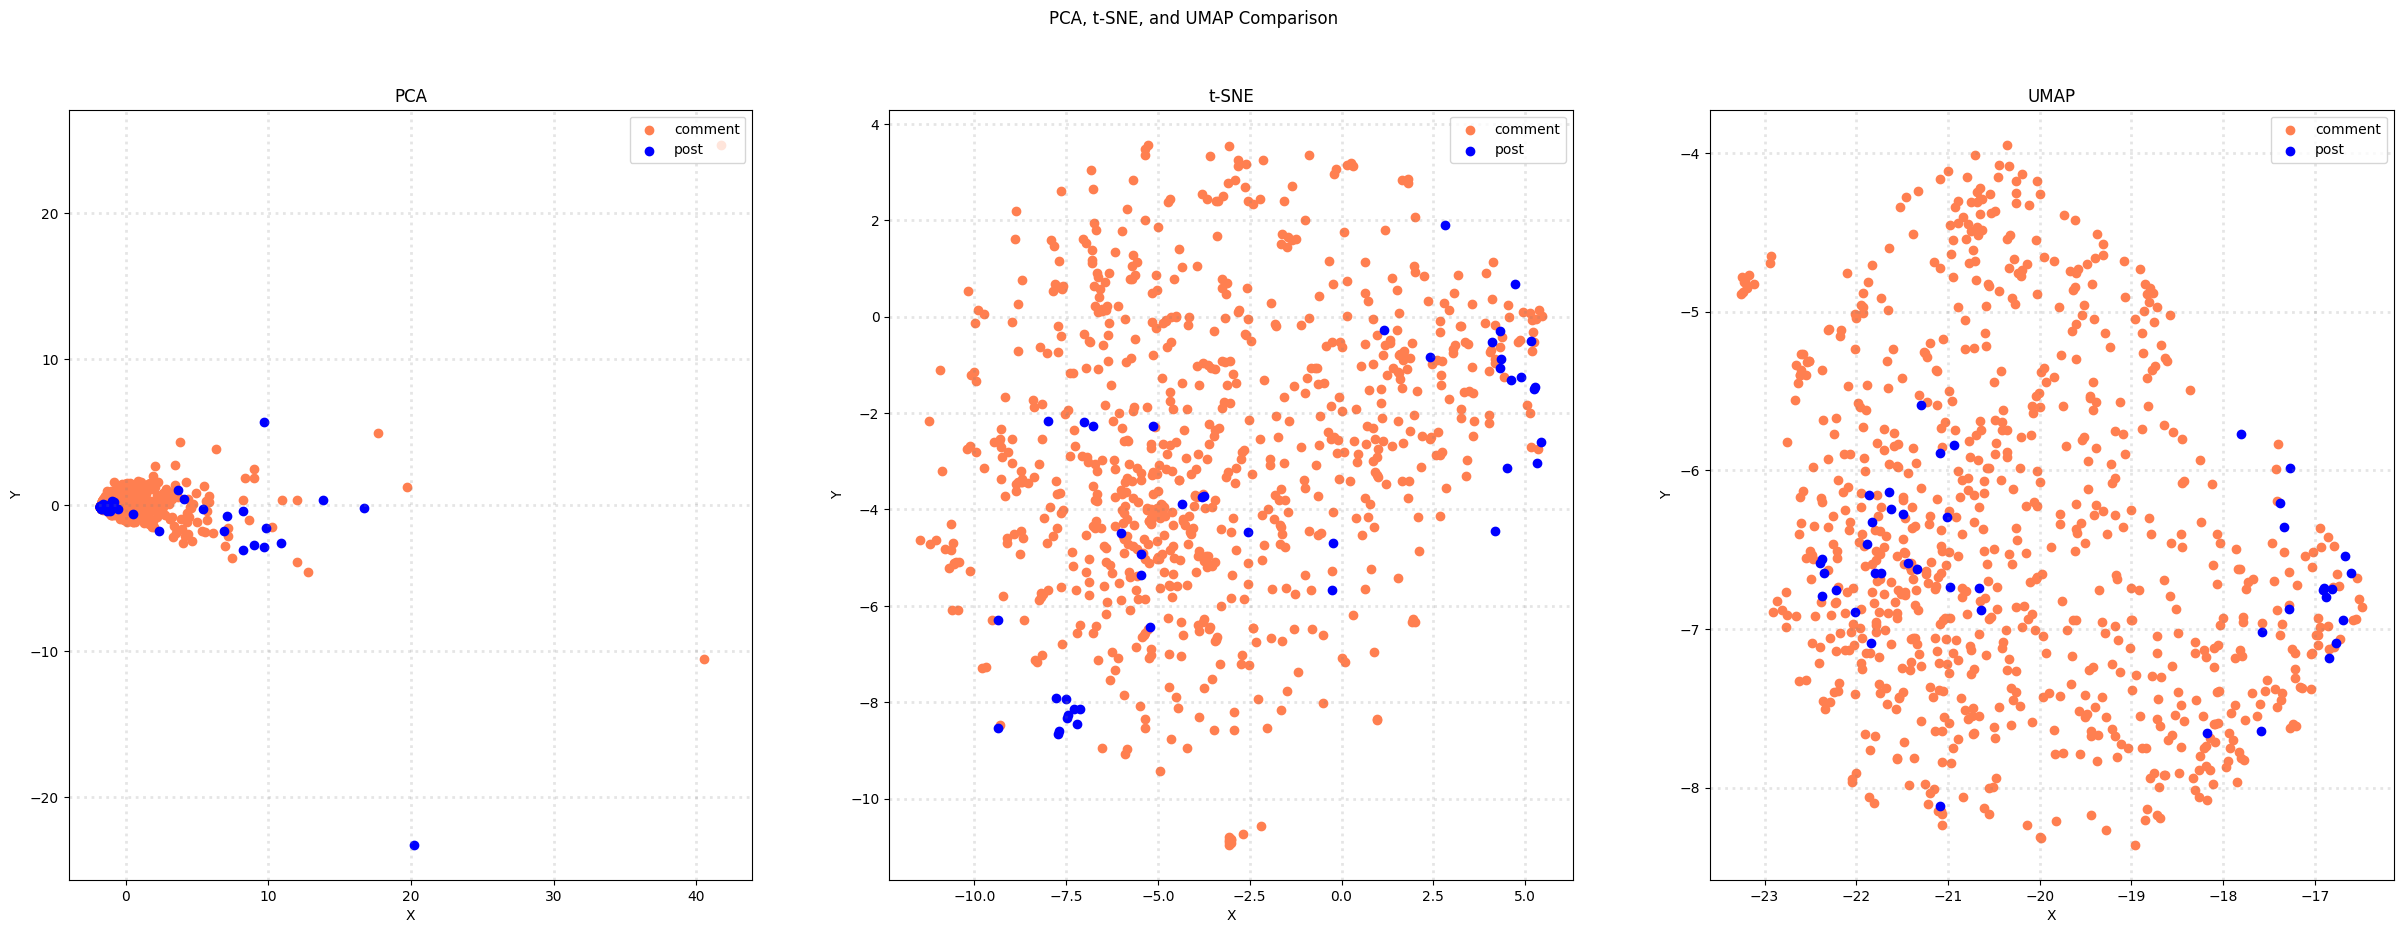

In [81]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_data['type'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_data['type'] == category].T[0]
        ys = X_reduced[reddit_data['type'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [82]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

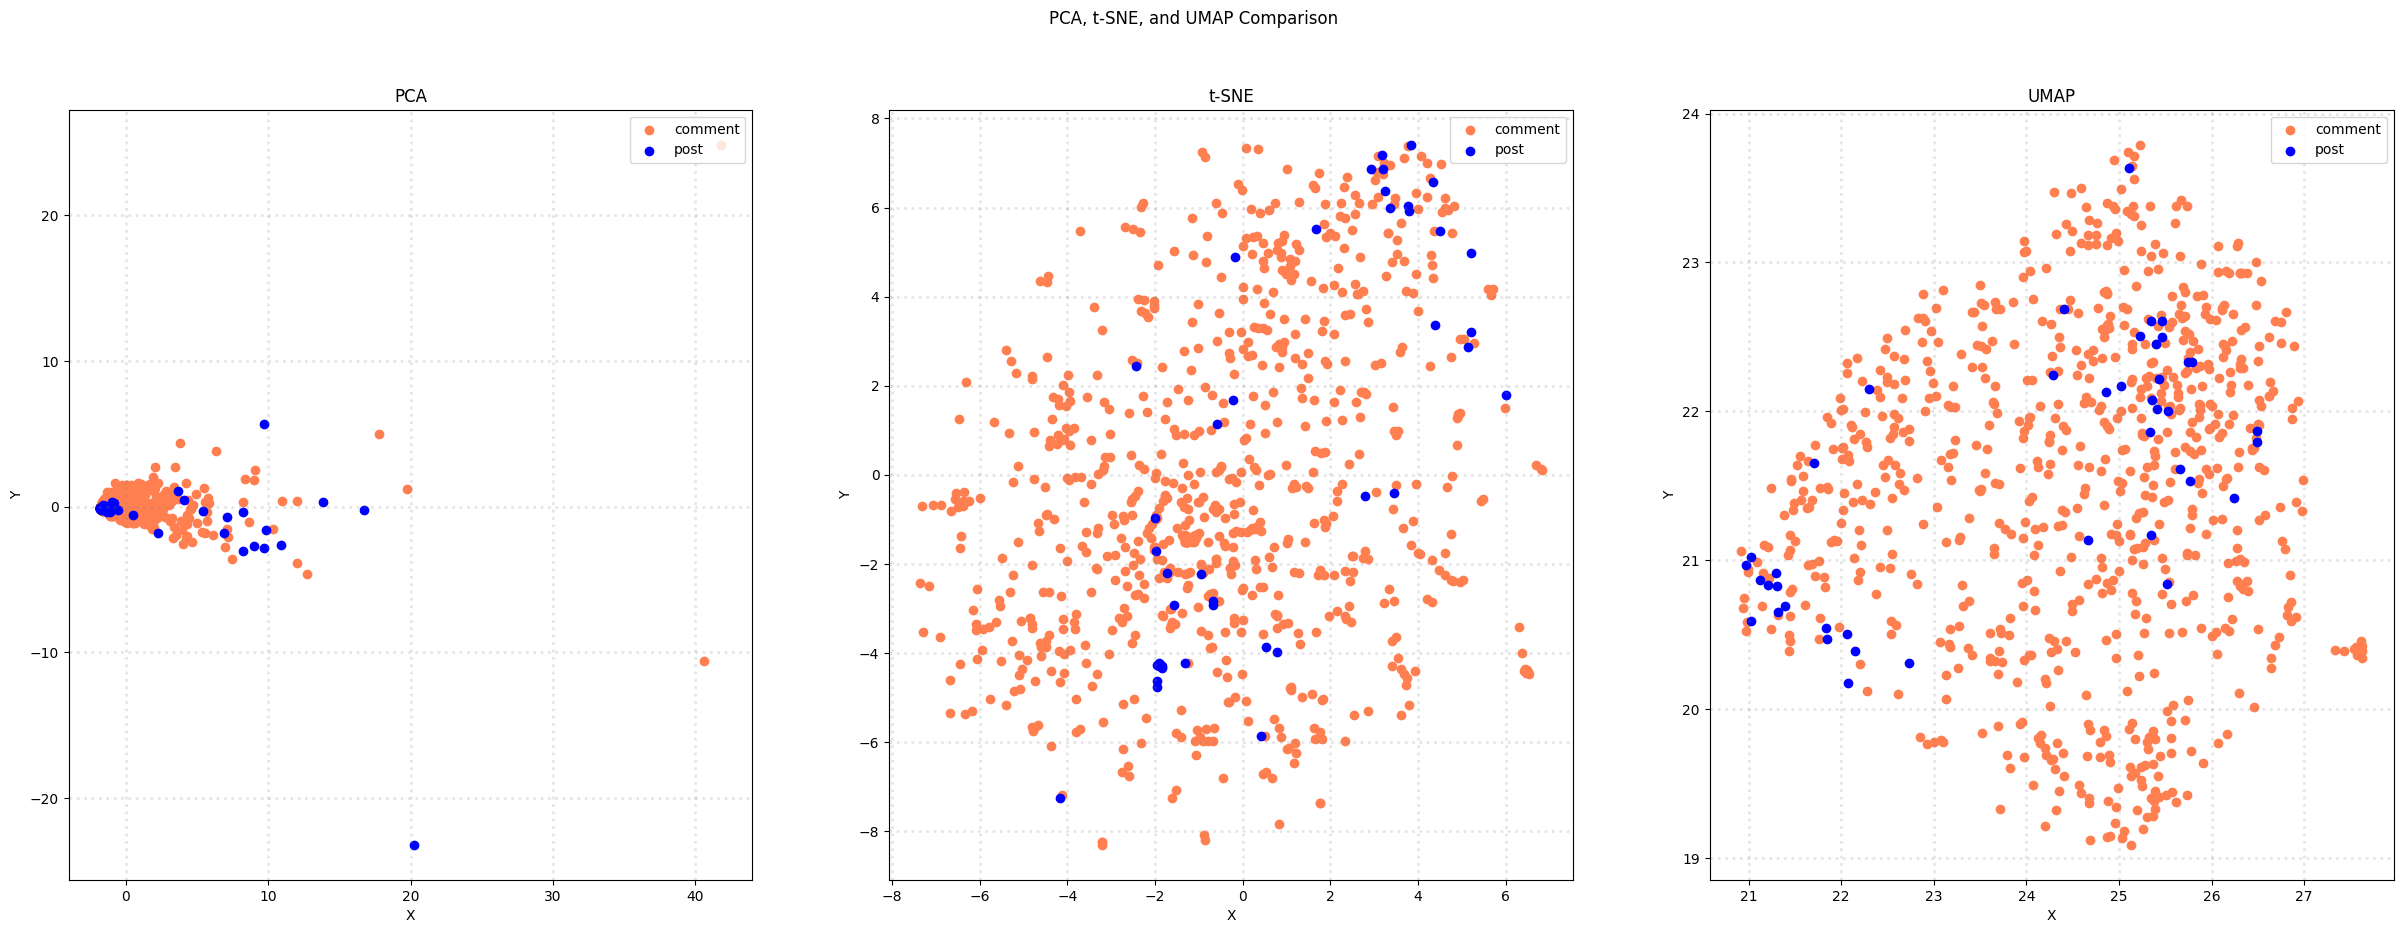

In [83]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_data['type'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_data['type'] == category].T[0]
        ys = X_reduced[reddit_data['type'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

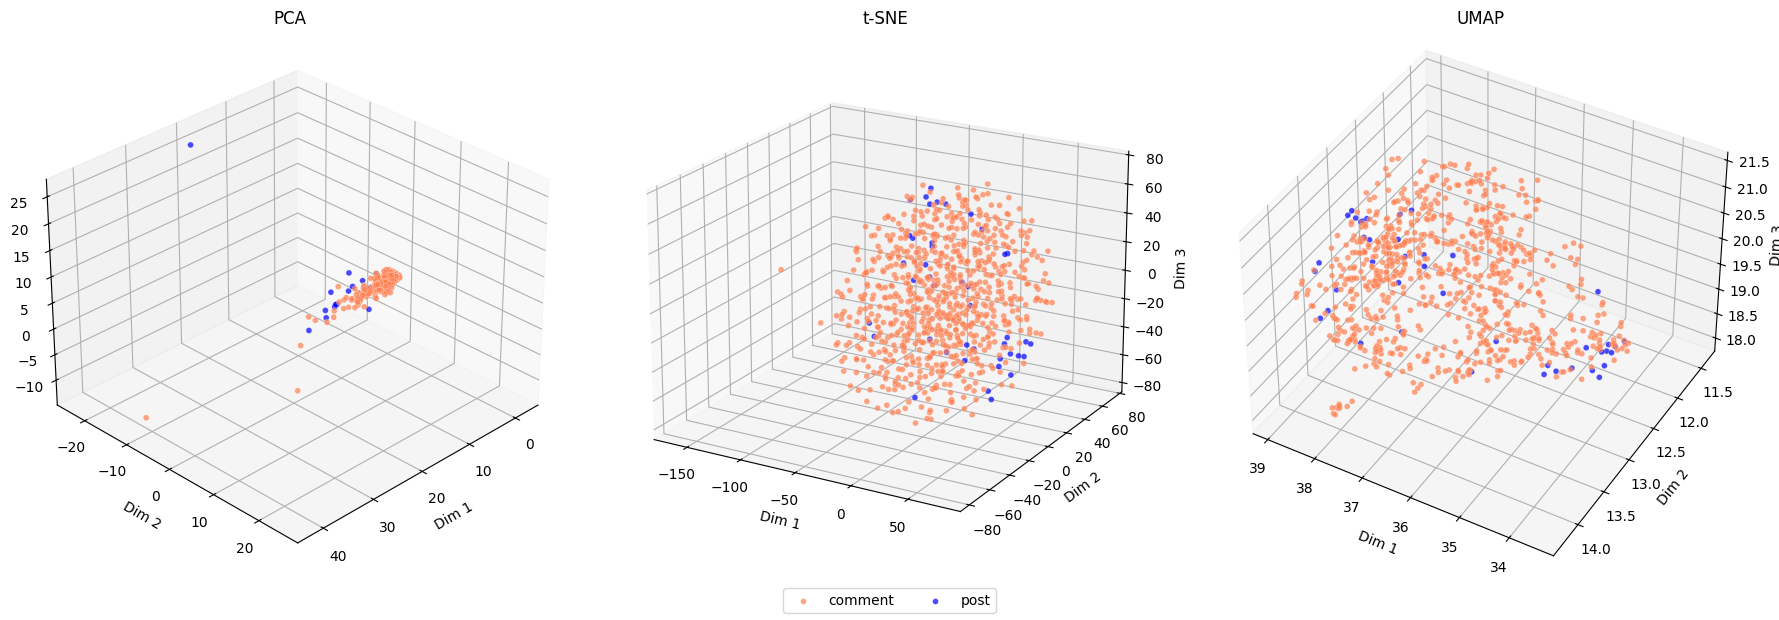

In [87]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


col = ['coral', 'blue', 'black', 'orange']
categories = reddit_data['type'].unique()

fig = plt.figure(figsize=(18, 6))
titles = ['PCA', 't-SNE', 'UMAP']
embeddings = [X_pca_aug, X_tsne_aug, X_umap_aug]

# different camera angles for each subplot (elev, azim)
views = [(30, 45), (20, -60), (40, 120)]

for i, (emb, title, view) in enumerate(zip(embeddings, titles, views), start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    for c, category in zip(col, categories):
        mask = (reddit_data['type'] == category).values
        pts = emb[mask]
        ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2],
                   c=c, label=category, s=18, alpha=0.7, edgecolors='w', linewidths=0.2)
    ax.set_title(title)
    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_zlabel('Dim 3')
    ax.view_init(elev=view[0], azim=view[1])
    ax.grid(True, linestyle=':', alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(categories), frameon=True)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [88]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(reddit_data['type'])
reddit_data['bin_type'] = mlb.transform(reddit_data['type']).tolist()
reddit_data[0:9]

,type,title,author,text,sentiment,label,unigrams,tokenized_text,bin_type
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0,"[Calls, on, retards]","{on, Calls, retards}",[0]
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma...","{about, starting, ever, Stunt, politics, ever....",[0]
2,comment,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]","{lots, of, red, Seeing, the, in, ticker.}",[0]
3,post,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","{Marine, Torrente's, The, about, have, world, ...",[1]
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]","{He, you., say, didn’t, thank}",[0]
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{luck, warm, puss, wish, Hoping, tonight,, in,...",[0]
6,comment,Is the market in complete denial right now?,stoniey84,Trump will respond to china increasing their t...,-1.0,-1.0,"[Trump, will, respond, to, china, increasing, ...","{be, I, i, very, starting., will, increasing, ...",[0]
7,comment,Retardation is on the menu boys! WSB is so back,OSRSkarma,Confirmed not a trap. Its been like this for p...,1.0,0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","{this, not, have, spread, for, months,, slowly...",[0]
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,Am I the only one seeing the cup & handle brea...,1.0,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","{held, I, The, week, new, Green, one, 52, hand...",[0]


In [90]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = reddit_data.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_data.iloc[80]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_data.iloc[120]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [91]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.105409
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dansc\AppData\Local\Temp\ipykernel_25268\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

In [93]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

reddit_data['category'] = reddit_data['type'].apply(lambda x: 0 if x == 'post' else 1)

# Create a mapping from numerical labels to category names
category_mapping = dict(reddit_data[['category', 'type']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_data['category'], test_size=0.3, random_state=42)

In [94]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

        post     0.8182    0.6000    0.6923        15
     comment     0.9747    0.9914    0.9830       233

    accuracy                         0.9677       248
   macro avg     0.8964    0.7957    0.8376       248
weighted avg     0.9652    0.9677    0.9654       248



In [95]:
# Create a mapping from numerical labels to category names
category_mapping = dict(reddit_data[['category', 'type']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, reddit_data['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

        post     0.8182    0.6000    0.6923        15
     comment     0.9747    0.9914    0.9830       233

    accuracy                         0.9677       248
   macro avg     0.8964    0.7957    0.8376       248
weighted avg     0.9652    0.9677    0.9654       248



In [96]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_data['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.9516129032258065

Classification Report:
               precision    recall  f1-score   support

        post     0.6364    0.4667    0.5385        15
     comment     0.9662    0.9828    0.9745       233

    accuracy                         0.9516       248
   macro avg     0.8013    0.7247    0.7565       248
weighted avg     0.9463    0.9516    0.9481       248



In [97]:
#Answer

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, reddit_data['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))


Decision Tree Accuracy (TDM): 0.9435483870967742

Classification Report:
               precision    recall  f1-score   support

        post     0.5455    0.4000    0.4615        15
     comment     0.9620    0.9785    0.9702       233

    accuracy                         0.9435       248
   macro avg     0.7537    0.6893    0.7159       248
weighted avg     0.9368    0.9435    0.9394       248



# Part with the TF IDF

In [ ]:
# TODO: Check 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack, csr_matrix
import numpy as np
import pandas as pd

# Ensure target exists
y = reddit_data['category']  # 0 = post, 1 = comment

# TF-IDF matrix
tfidf_vect = TfidfVectorizer(max_features=20000, min_df=2)  # adjust params if needed
X_tfidf = tfidf_vect.fit_transform(reddit_data['text'])

# Count (word frequency) matrix: reuse reddit_data_tdm (sparse) created earlier

try:
    X_counts = reddit_data_tdm  # already a sparse matrix from earlier cell
except NameError:
    # fallback: rebuild counts
    from sklearn.feature_extraction.text import CountVectorizer
    _cv = CountVectorizer(min_df=2)
    X_counts = _cv.fit_transform(reddit_data['text'])

# Pattern matrix (from earlier pattern_matrix DataFrame). Convert to sparse for concatenation.
if 'pattern_matrix' in globals():
    X_pattern = csr_matrix(pattern_matrix.values)
else:
    X_pattern = csr_matrix((len(reddit_data), 0))

# Helper to train & evaluate
def train_eval(model, X, y, desc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {desc} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))

#Word frequencies -> MultinomialNB
train_eval(MultinomialNB(), X_counts, y, "Counts (word frequency) + MultinomialNB")

#Counts + pattern features (augmentation)
if X_pattern.shape[1] > 0:
    X_counts_aug = hstack([X_counts, X_pattern])
    train_eval(MultinomialNB(), X_counts_aug, y, "Counts + Patterns (augmented) + MultinomialNB")
else:
    print("\nSkipping Counts+Patterns: no pattern features found.")

#TF-IDF -> ComplementNB (often better with TF-IDF / imbalanced feature effects)
train_eval(ComplementNB(), X_tfidf, y, "TF-IDF + ComplementNB")

#TF-IDF + pattern features (augmentation)
if X_pattern.shape[1] > 0:
    X_tfidf_aug = hstack([X_tfidf, X_pattern])
    train_eval(ComplementNB(), X_tfidf_aug, y, "TF-IDF + Patterns (augmented) + ComplementNB")
else:
    print("\nSkipping TF-IDF+Patterns: no pattern features found.")




=== Counts (word frequency) + MultinomialNB ===
Accuracy: 0.9556451612903226
              precision    recall  f1-score   support

           0     0.5714    0.6154    0.5926        13
           1     0.9786    0.9745    0.9765       235

    accuracy                         0.9556       248
   macro avg     0.7750    0.7949    0.7846       248
weighted avg     0.9573    0.9556    0.9564       248


=== Counts + Patterns (augmented) + MultinomialNB ===
Accuracy: 0.9596774193548387
              precision    recall  f1-score   support

           0     0.6154    0.6154    0.6154        13
           1     0.9787    0.9787    0.9787       235

    accuracy                         0.9597       248
   macro avg     0.7971    0.7971    0.7971       248
weighted avg     0.9597    0.9597    0.9597       248


=== TF-IDF + ComplementNB ===
Accuracy: 0.8669354838709677
              precision    recall  f1-score   support

           0     0.2059    0.5385    0.2979        13
           1   

# Task 4

Issues found:

There is not that much cleaning of the tokens, like removing nonsensical combinations or cleaning for urls, emails, etc. 

Also Transaction tokens appear case/punctuation inconsistent; this inflates vocabulary and slows mining.

No use of vectorizer options or dimensionality reduction best practices:
No min_df, max_df, ngram_range, stop_words, nor sparse/parallel options; vocabulary not pruned.

As I see there is no saving of the current dfs, so to start again from a later point in the code we need to run it from the beginning 

Concrete improvements:

Normalize and clean text early:
Lowercase, remove/control punctuation, remove URLs/emails, replace numbers with token.

Prune vocabulary and use sparse representations:
Apply min_df (or min_df absolute), max_df, limit max_features, remove rare tokens before FP-growth.

Precompute boolean masks once in plotting and reuse.

Preprocess before mining:
Map tokens to IDs, sort tokens per transaction, remove duplicates inside transactions, compress to sparse int arrays.